# Chapter 14: Deep Computer Vision using CNNs

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

In [13]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [6]:
# Load sample images

china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') / 255

images = np.array([china, flower])
batch_size, height, width, channels = images.shape

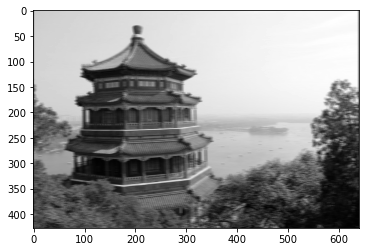

In [10]:
#create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

outputs = tf.nn.conv2d(images, filters,  strides=1, padding='SAME')

plt.imshow(outputs[0, :, :, 1], cmap='gray')

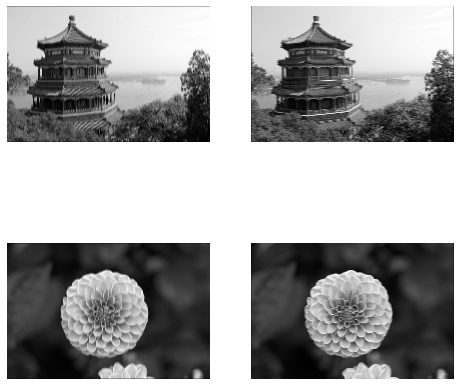

In [18]:
for image_index in range(len(images)):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index*2 + feature_map_index+1, )
        plot_image(outputs[image_index, :, :, feature_map_index])

# Convolutional in Keras

In [19]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='SAME', activation='relu')